## **Next-Generation Agricultural Market Forecasting and Insights System for Kenya**

### Business Understanding
### Business Overview

Kenya’s economic stability is intrinsically linked to the performance of its agricultural sector, which serves as both a primary GDP contributor and the backbone of livelihoods for millions of households. However, the sector continues to face structural inefficiencies characterized by persistent price volatility, fragmented market coordination, information asymmetry, and sentiment-driven demand fluctuations. These systemic challenges erode income predictability for farmers and traders, constrain value chain optimization, and ultimately weaken overall market resilience. In a data-driven global economy, the absence of real-time market intelligence and forward-looking analytics represents a critical strategic gap. Addressing this gap through an integrated, predictive market insights and forecasting system presents a transformative opportunity to enhance transparency, stabilize incomes, strengthen decision-making, and drive sustainable economic impact across Kenya’s agricultural ecosystem.
Stakeholders and Their Gains
Farmers (Small-Scale & Large-Scale)
Gains:
Informed decisions on when and where to sell their produce for maximum profit.
Insights into seasonal price trends to optimize crop production cycles.
Awareness of public sentiment that may impact market demand.


### Traders & Distributors (Wholesalers & Retailers)
#### Gains:
Forecasting tools to plan optimal buying and selling times.
Reduction in losses due to unexpected price drops.
Better logistics planning by analyzing regional price variations.

### Consumers (General Public)
#### Gains:
Awareness of expected price changes for household budgeting.
More stable prices due to better market efficiency.
Potential for lower food costs as market inefficiencies decrease.

### Problem Statement
Kenya’s agricultural markets exhibit pronounced price volatility across regions and commodity categories, creating significant uncertainty for market participants. These fluctuations are driven by seasonal production cycles, shifting demand patterns, regional supply imbalances, and evolving public perception. For example, staple commodities such as maize experience substantial temporal and geographic price disparities, directly influencing farmers’ commercialization strategies and revenue outcomes. Compounding these structural inefficiencies is the growing influence of digital public sentiment, particularly on social media platforms, which increasingly shapes market expectations and short-term demand behavior. The convergence of these factors results in a complex and opaque decision-making environment, limiting stakeholders’ ability to optimize pricing, distribution, and market timing strategies.

### Objectives
### Assess Commodity Price Fluctuations
* Evaluate the price volatility of various commodities across different regions and time periods
* Identify the factors contributing to price fluctuations, such as seasonal variations, market demand e.t.c.
### Analyze Market Trends:
* Monitor market trends and patterns in commodity prices using historical data and advanced analytics.
* Develop predictive models to forecast future market trends and price movements.


**DATA UNDERSTANDING**

The primary dataset contains Food Prices data for Kenya, sourced from the Kenya Agricultural Market Information System KAMIS, developed by the Ministry of Agriculture, Livestock, Fisheries, and Cooperatives. This database covers foods such as maize, rice, beans and beef, ,is updated daily(though mostly contains monthly data). The platform offers data on commodity prices, trade volumes, and market highlights

***Understanding rows and columns of our data***

In [48]:
#importing necessary libraries
import pandas as pd
import glob
import os
import warnings
import time
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from pandas.tseries.offsets import MonthEnd
# importing custom scripts for different functions
sys.path.append('scripts')  # add scripts to path

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.get_logger().setLevel('ERROR')


# Ignore warnings
warnings.filterwarnings("ignore")

In [49]:
# Setting the directory containing our CSV files
csv_directory = "./data/Products"  
# Using glob to match all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_directory, '*.csv'))
# Initialize an empty list to hold DataFrames
data_frames = []

# Iterating over the list of CSV files
for file in csv_files:
    # Reading each CSV file into a DataFrame
    df = pd.read_csv(file)
    # Appending the DataFrame to the list
    data_frames.append(df)

# Concatenating all DataFrames in the list into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# Reading the data from the combined CSV file
data = pd.read_csv("combined.csv")
data

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date
0,Banana (Ripening),-,-,-,Mukuyu Market,-,50.00/Kg,NaN,Muranga,2026-02-11
1,Banana (Ripening),-,-,-,Mulot,70.00/Kg,100.00/Kg,1500.0,Bomet,2026-02-11
2,Banana (Ripening),-,-,-,Kitale Municipality Market,80.00/Kg,100.00/Kg,6000.0,Trans-Nzoia,2026-02-11
3,Banana (Ripening),-,-,-,Kerugoya,20.00/Kg,40.00/Kg,300.0,Kirinyaga,2026-02-10
4,Banana (Ripening),-,-,-,Bondeni,80.00/Kg,100.00/Kg,5000.0,Trans-Nzoia,2026-02-10
...,...,...,...,...,...,...,...,...,...,...
57005,Beans (Yellow-Green),-,-,-,Molo,-,250.00/Kg,40.0,Nakuru,2024-02-01
57006,Beans (Yellow-Green),-,-,-,Nyeri open air,155.56/Kg,180.00/Kg,NaN,Nyeri,2024-01-31
57007,Beans (Yellow-Green),-,-,-,Makutano Kirinyaga,116.67/Kg,130.00/Kg,1600.0,Kirinyaga,2024-01-31
57008,Beans (Yellow-Green),-,-,-,Nakuru Wakulima,140.00/Kg,-,NaN,Nakuru,2024-01-31


Checking the information of the data	to understand the number of rows and columns, data types, and missing values.

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57010 entries, 0 to 57009
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Commodity       57010 non-null  object 
 1   Classification  57010 non-null  object 
 2   Grade           57010 non-null  object 
 3   Sex             57010 non-null  object 
 4   Market          57010 non-null  object 
 5   Wholesale       57010 non-null  object 
 6   Retail          57010 non-null  object 
 7   Supply Volume   39235 non-null  float64
 8   County          56991 non-null  object 
 9   Date            57010 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.3+ MB


In [51]:
#Checking for missing values in the different columns of the data
data.isna().sum()

Commodity             0
Classification        0
Grade                 0
Sex                   0
Market                0
Wholesale             0
Retail                0
Supply Volume     17775
County               19
Date                  0
dtype: int64

Checking for number of duplicated in the data

In [52]:
data.duplicated().sum()

np.int64(4259)

Dropping duplicates from	the data to ensure data quality and accuracy in analysis.

In [53]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

Filling the null values in the county column using mode and groupby

In [54]:
data['County'] = data.groupby('Market')['County'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

Filling the missing values in the supply volume column

In [55]:
# Computing median values for each commodity
supply_medians = data.groupby('Commodity')[['Supply Volume']].median()
print(supply_medians)

# Imputing the missing values with median
def impute_supply_median(row):
    if pd.isna(row['Supply Volume']):
        row['Supply Volume'] = supply_medians.loc[row['Commodity'], 'Supply Volume']
    return row
# Applying imputation
data = data.apply(impute_supply_median, axis=1)

                             Supply Volume
Commodity                                 
Banana (Cooking)                    1500.0
Banana (Ripening)                   1500.0
Beans (Yellow-Green)                1500.0
Beans Red Haricot (Wairimu)         1200.0
Cabbages                            3500.0
Cowpea leaves (Kunde)                300.0
Cowpeas                              850.0
Dry Maize                           5000.0
Dry Onions                          2500.0
Finger Millet                        650.0
Kales/Sukuma Wiki                    900.0
Maize Flour                         3876.0
Meat Beef                           1300.0
Omena                               1200.0
Red Irish potato                    3000.0
Red Sorghum                          650.0
Rice                                2200.0
Spinach                              460.0
Wheat                                630.0


In [56]:
#Confirming if all the null values have been filled
data.isnull().sum()

Commodity         0
Classification    0
Grade             0
Sex               0
Market            0
Wholesale         0
Retail            0
Supply Volume     0
County            0
Date              0
dtype: int64

Changing the data type of the date column to datetime

In [57]:
data['Date'] = pd.to_datetime(data['Date'])

Dropping columns that won't be used in the analysis

In [58]:
data= data.drop(columns=["Classification", "Grade", "Sex"])

In [59]:
#Checking the first few rows after cleaning the data
data.head()

,Commodity,Market,Wholesale,Retail,Supply Volume,County,Date
0,Banana (Ripening),Mukuyu Market,-,50.00/Kg,1500.0,Muranga,2026-02-11
1,Banana (Ripening),Mulot,70.00/Kg,100.00/Kg,1500.0,Bomet,2026-02-11
2,Banana (Ripening),Kitale Municipality Market,80.00/Kg,100.00/Kg,6000.0,Trans-Nzoia,2026-02-11
3,Banana (Ripening),Kerugoya,20.00/Kg,40.00/Kg,300.0,Kirinyaga,2026-02-10
4,Banana (Ripening),Bondeni,80.00/Kg,100.00/Kg,5000.0,Trans-Nzoia,2026-02-10


In [60]:
# Confirming if there is any missing value 
data.isnull().sum()

Commodity        0
Market           0
Wholesale        0
Retail           0
Supply Volume    0
County           0
Date             0
dtype: int64

Cleaning the wholesale and retail price columns by removing the commas and converting them to numeric data types

In [61]:
def clean_price(series):
	clean_series = pd.to_numeric(series.astype(str).str.replace('[^0-9.]', '', regex=True), errors='coerce')
	return clean_series

data["Wholesale"] = clean_price(data["Wholesale"])
data["Retail"] = clean_price(data["Retail"])

In [62]:
data.isnull().sum()

Commodity            0
Market               0
Wholesale        11061
Retail            2194
Supply Volume        0
County               0
Date                 0
dtype: int64

Found missing values after cleaning the price columns.
```python 
Filled the null values using 0

In [63]:
data["Wholesale"] = data["Wholesale"].fillna(0)
data["Retail"] = data["Retail"].fillna(0)
data.isnull().sum()

Commodity        0
Market           0
Wholesale        0
Retail           0
Supply Volume    0
County           0
Date             0
dtype: int64

Created a new columns 'Price argin and Margin percentage' to analyze the profitability of the commodities by calculating the difference between retail and wholesale prices and expressing it as a percentage of the wholesale price.

In [64]:
# Calculating absolute price difference
data['Price_Margin'] = data['Retail'] - data['Wholesale']
data = data[data['Wholesale'] > 0].copy()
# Calculating percentage margin, handling division by zero
data['Margin_Percentage'] = (data['Price_Margin'] / data['Wholesale']) * 100

Converting the new columns to numeric data type

In [65]:
for col in ['Retail', 'Wholesale']:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41690 entries, 1 to 52750
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Commodity          41690 non-null  object        
 1   Market             41690 non-null  object        
 2   Wholesale          41690 non-null  float64       
 3   Retail             41690 non-null  float64       
 4   Supply Volume      41690 non-null  float64       
 5   County             41690 non-null  object        
 6   Date               41690 non-null  datetime64[ns]
 7   Price_Margin       41690 non-null  float64       
 8   Margin_Percentage  41690 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 3.2+ MB


#### Which are Top 10 Commodities by Average Margin Percentage?

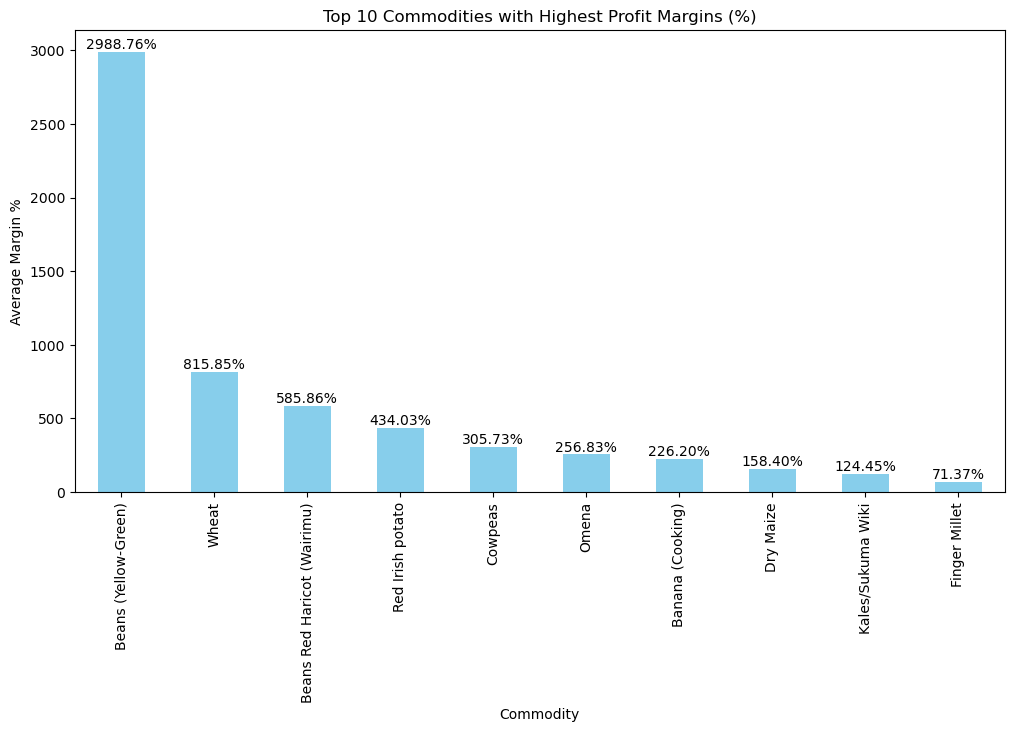

In [66]:
# Visualizing top 10 commodities by average profit margin percentage
plt.figure(figsize=(12, 6))
df1 = data.groupby('Commodity')['Margin_Percentage'].mean().sort_values(ascending=False)
df1.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Commodities with Highest Profit Margins (%)')
plt.ylabel('Average Margin %')
for i in range(len(df1.head(10))):
				plt.text(i, df1.head(10).values[i], f"{df1.head(10).values[i]:.2f}%", ha='center', va='bottom');


***Yellow-Green beans have the highest average margin percentage of 2988% followed by Wheat and Red Haricot beans with over 500%***

#### Which are Top 10 Counties by Total Supply Volume?

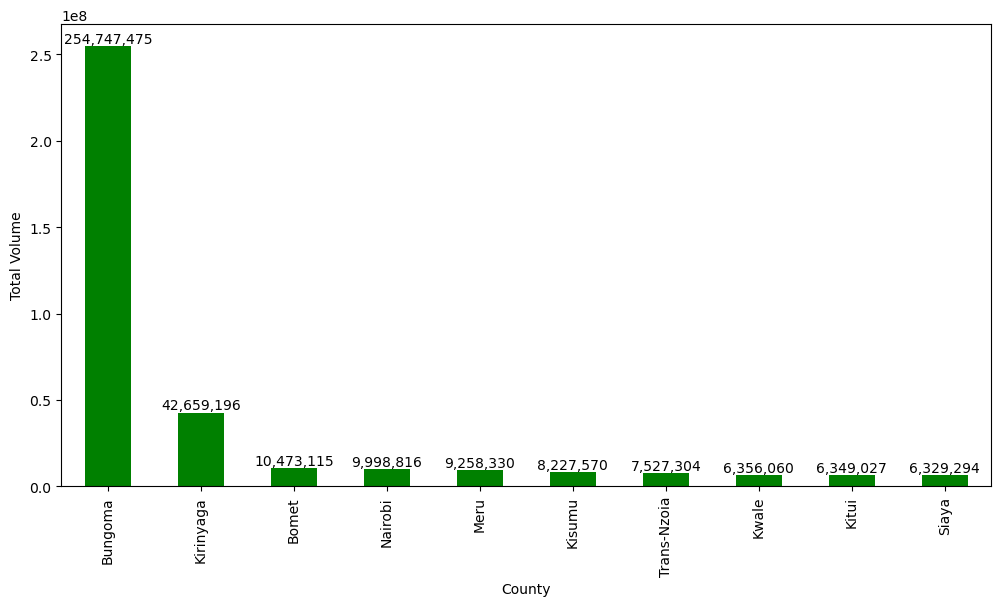

In [67]:

plt.figure(figsize=(12, 6))
df2 = data.groupby('County')['Supply Volume'].sum().sort_values(ascending=False)
df2.head(10).plot(kind='bar', color='green')
plt.ylabel('Total Volume')
for	i in range(len(df2.head(10))):
				plt.text(i, df2.head(10).values[i], f"{df2.head(10).values[i]:,.0f}", ha='center', va='bottom');

***Bungoma has the highest supply volume of more than 25.7 million followed by Kirinyaga with over 42.6 million.***

What are the top 10 most expensive commodities by average retail price in the market?

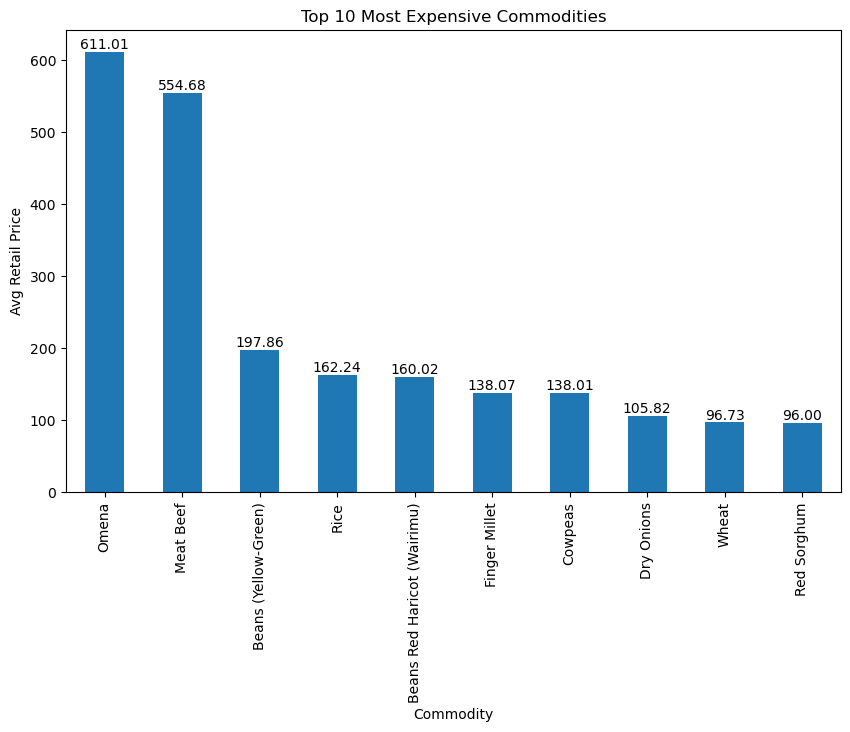

In [68]:
# Analyzing price trends for key commodities
plt.figure(figsize=(10,6))
df3 = data.groupby('Commodity')['Retail'].mean().sort_values(ascending=False)
df3.head(10).plot(kind='bar')
plt.ylabel("Avg Retail Price")
plt.title("Top 10 Most Expensive Commodities")
for i in range(len(df3.head(10))):
				plt.text(i, df3.head(10).values[i], f"{df3.head(10).values[i]:,.2f}", ha='center', va='bottom');

***Omena and Meat beef are the most expensive commodities where their average retail price is more than 550 ksh and Beans(Yellow-Green) and Rice, Beans red harricot(wairimu), finger millet, cowpeas and dry onions have an average retail price of more than 100 ksh.***
```python

### Is there any correlation between the features in the dataset?

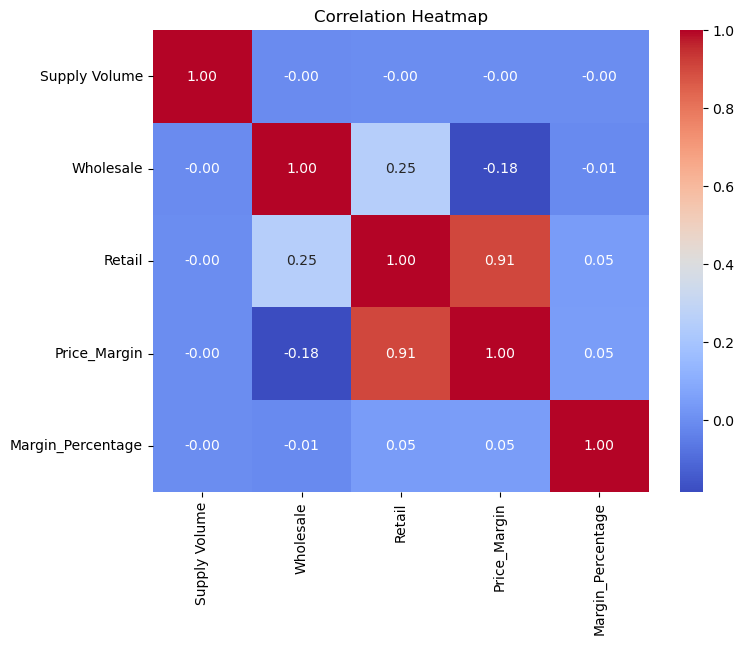

In [69]:
# Analyzing price trends for key commodities
plt.figure(figsize=(8, 6))
correlation = data[['Supply Volume', 'Wholesale', 'Retail', 'Price_Margin', 'Margin_Percentage']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

***Retail and Price-Margin have a very strong positive correlation of 91% while supply volume has 0 corellation with all the features. Wholesale and retail have a weak positive correlation of 25%***


Interpolating the retail and wholesale collumns to fill gaps in price trends

In [70]:
# Sorting data by Date and Commodity first
data = data.sort_values(['Commodity', 'Date'])
# Using linear interpolation to fill gaps in price trends
data['Retail'] = data.groupby(['Market', 'Commodity'])['Retail'].transform(lambda x: x.interpolate(method='linear'))
data['Wholesale'] = data.groupby(['Market', 'Commodity'])['Wholesale'].transform(lambda x: x.interpolate(method='linear'))

In [71]:
# Calculating Coefficient of Variation - a measure of volatility
volatility = data.groupby(['Market', 'Commodity'])['Retail'].std() / data.groupby('Commodity')['Retail'].mean()
print("Top 5 Most Volatile Commodities (Hardest to predict):")
print(volatility.sort_values(ascending=False).head())

Top 5 Most Volatile Commodities (Hardest to predict):
Market                    Commodity                  
Lungalunga                Banana (Cooking)               61.967454
                          Dry Maize                      35.350013
Chepterit Market - Nandi  Dry Maize                      21.463823
Musoli Market             Beans Red Haricot (Wairimu)    18.775163
Nyamakima                 Wheat                          18.608361
Name: Retail, dtype: float64


Which markets that have the highest and lowest supply volume?

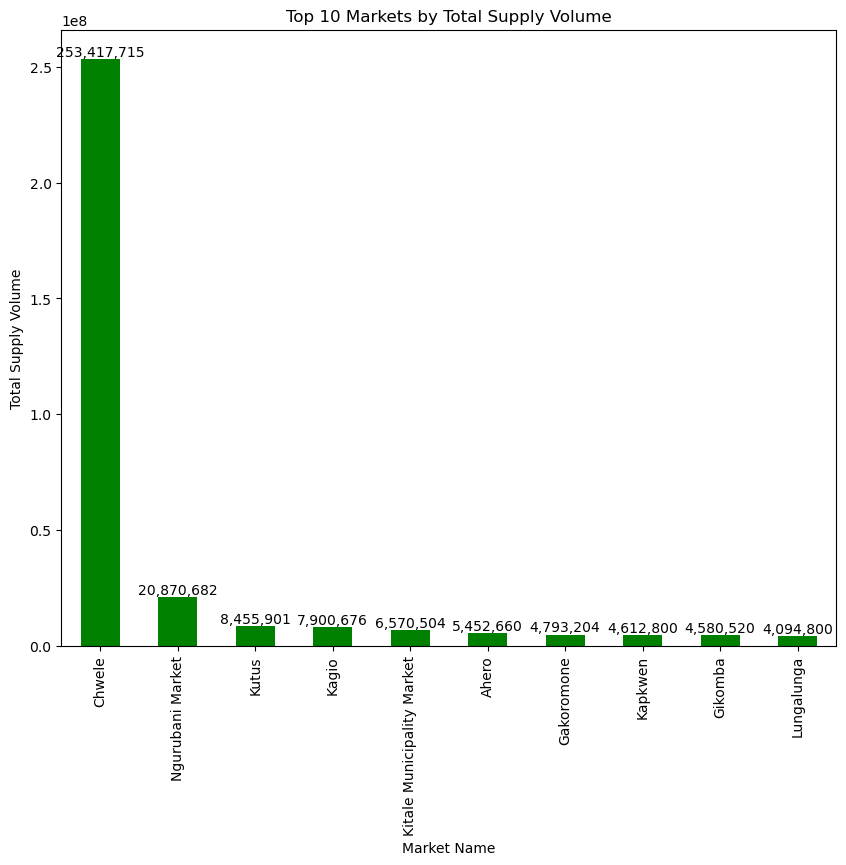

In [72]:
# Visualizing top 10 markets by total supply volume
plt.figure(figsize=(10,8))
df5 = data.groupby('Market')['Supply Volume'].sum().sort_values(ascending=False)
df5.head(10).plot(kind='bar', color='green')
plt.xlabel("Market Name")
plt.ylabel("Total Supply Volume")
plt.title('Top 10 Markets by Total Supply Volume')
total = data.groupby('Market')['Supply Volume'].sum().sum()
for i in range(len(df5.head(10))):
				plt.text(i, df5.head(10).values[i], f"{df5.head(10).values[i]:,.0f}", ha='center', va='bottom');


***Chwele market in Bungoma county leads with about 253.4 million supply volume while Ngurubani, Kutus and Kagio in Kirinyaga County follows with more than 7.9 each.***
```python

#### Filtering the Nairobi	market data to analyze the price trends in the capital city

In [73]:
# Creating a list of markets for major cities
Nairobi_data = data[data['County'].str.contains('Nairobi', case=False, na=False)]

What are the top 10markets in Nairobi with the highest supply volume?

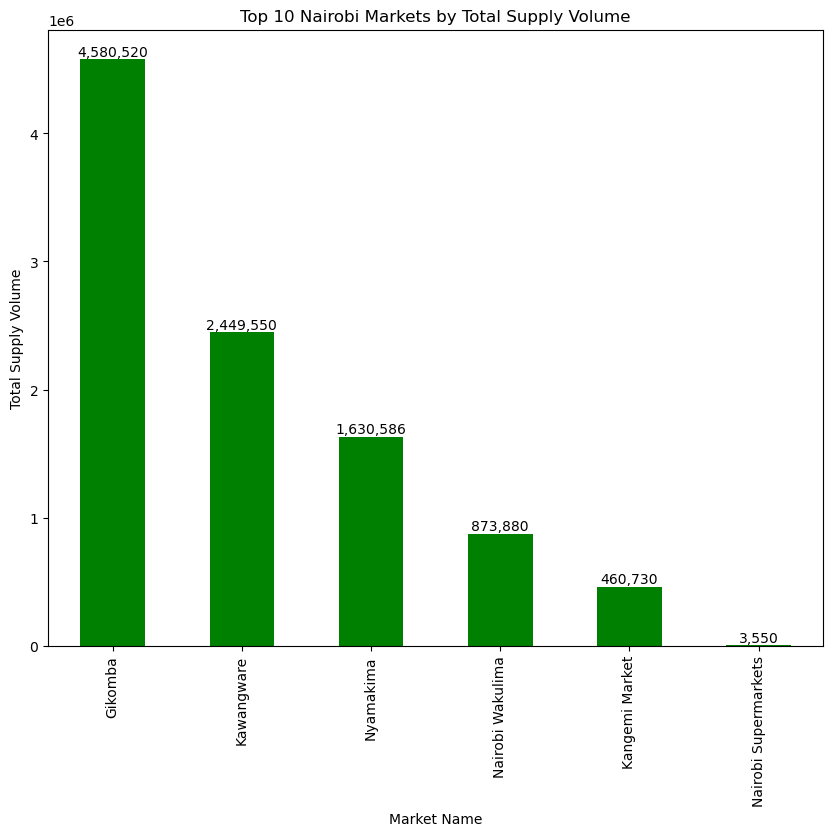

In [74]:
plt.figure(figsize=(10,8))
df6=Nairobi_data.groupby('Market')['Supply Volume'].sum().sort_values(ascending=False)
df6.head(10).plot(kind='bar', color='green')
plt.xlabel("Market Name")
plt.ylabel("Total Supply Volume")
plt.title('Top 10 Nairobi Markets by Total Supply Volume')
total = Nairobi_data.groupby('Market')['Supply Volume'].sum().sum()
for i in range(len(df6.head(10))):
				plt.text(i, df6.head(10).values[i], f"{df6.head(10).values[i]:,.0f}", ha='center', va='bottom');


***Gikomba market has the highest supply volume of about 4.5 million then Kawangware with 2.4 million. Nairobi supermarkets have the least supply volume of 3550.***

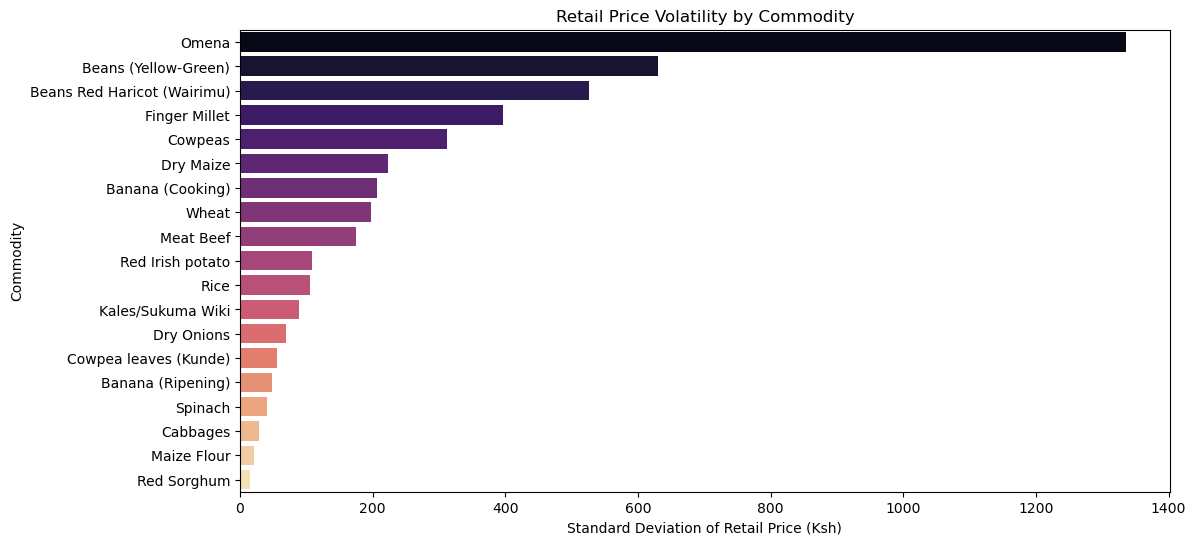

In [75]:
# Computing Volatility per Commodity 
volatility = data.groupby('Commodity')['Retail'].std().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=volatility.values, y=volatility.index, palette="magma")
plt.title("Retail Price Volatility by Commodity")
plt.xlabel("Standard Deviation of Retail Price (Ksh)")
plt.ylabel("Commodity")
plt.show()


- Some commodities tend to fluctuate more, like Omena, Dry Maize, Finger Millet, and Rice.  
- These swings can affect planning for buyers and sellers.  
- Being aware of this helps in making smarter decisions around commodity prices.


#### What is the trend of average retail price over time?

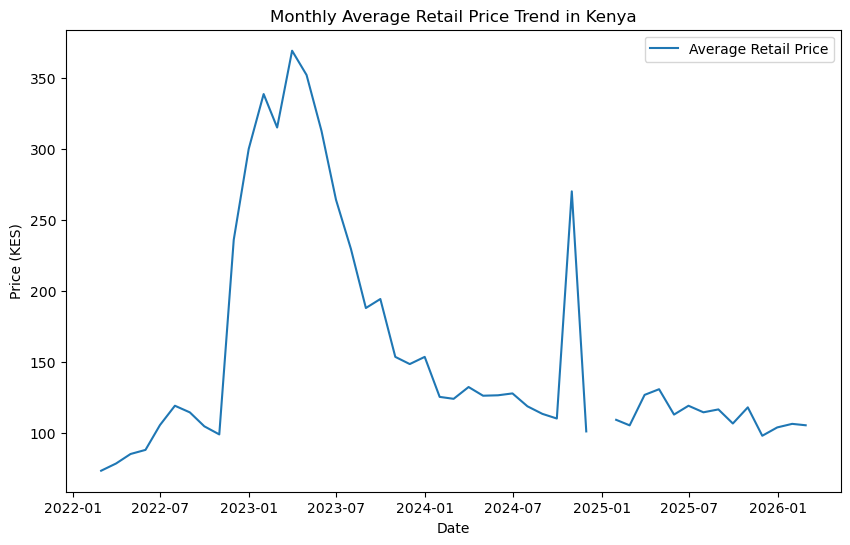

In [76]:
# Resampling to monthly frequency
# Aggregating by taking the mean retail price per day/month
ts_data = data.set_index('Date').resample('M')['Retail'].mean()
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label='Average Retail Price')
plt.title('Monthly Average Retail Price Trend in Kenya')
plt.xlabel('Date')
plt.ylabel('Price (KES)')
plt.legend()
plt.show()


***The average retail price exhibits an initial period of high volatility characterized by a sharp surge and subsequent correction. Then the prices stabilize at a lower level, with occasional short-lived shocks that do not persist. This indicates a market that experienced a significant disruption but later achieved relative equilibrium.

In [77]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

#### Grouping Commodity, County, and Month to get average retail price

In [78]:
monthly_data = data.groupby([
    'Commodity', 
    'County', 
    pd.Grouper(key='Date', freq='MS')
])['Retail'].mean().reset_index()

#### What is the trend of the average retail price over time for Dry maize, Red Irish Potatoes and wheat?

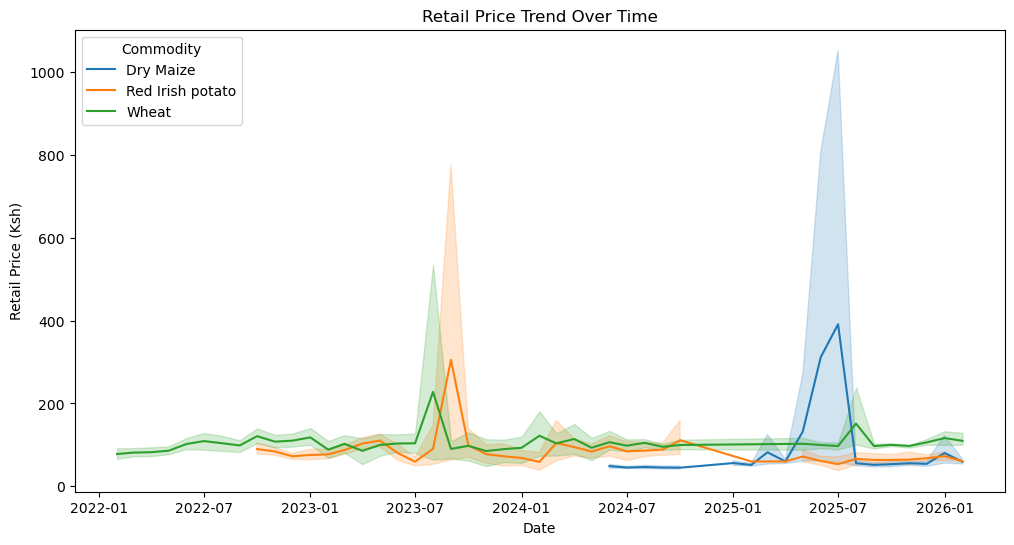

In [79]:
key_commodities = ["Red Irish potato","Wheat","Dry Maize"]
subset = monthly_data[monthly_data['Commodity'].isin(key_commodities)]
plt.figure(figsize=(12,6))
sns.lineplot(data=subset, x='Date', y='Retail', hue='Commodity')
plt.title("Retail Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Retail Price (Ksh)")
plt.show()


- The prices go up and down over time.
- Dry Maize changes more sharply than Wheat and Red Irish Potato.
- The three commodities seem to move in similar directions most of the time.
- Sudden increases may be linked to supply challenges or market changes.


#### What are the top 5 commodities by average retail price?

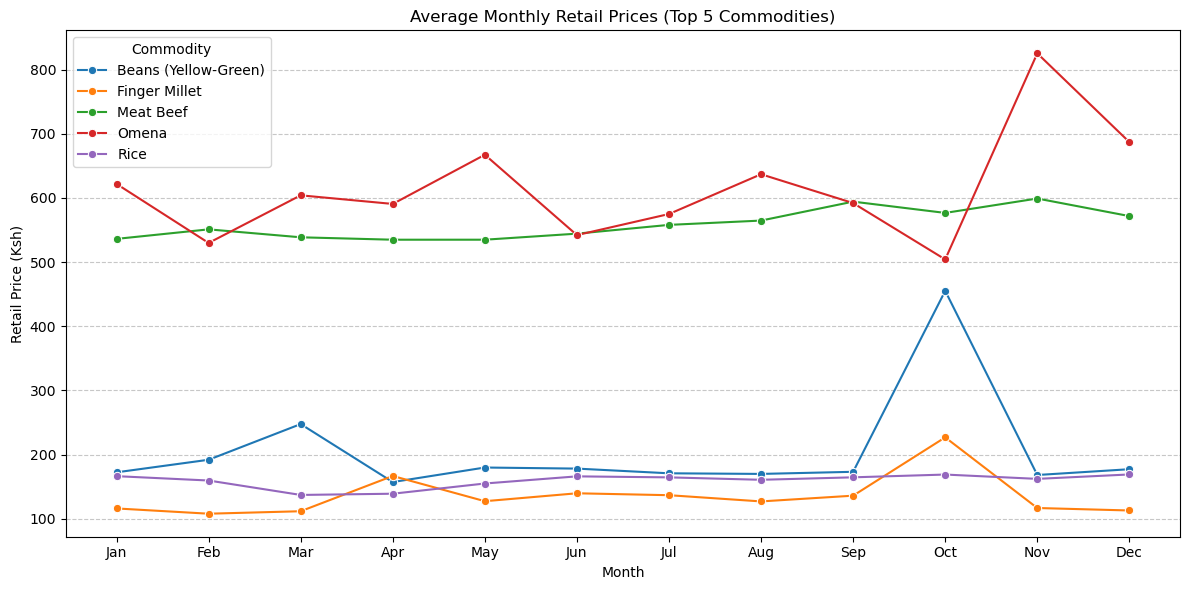

In [80]:
# Identifying top 5 commodities by average retail price
top_5 = monthly_data.groupby('Commodity')['Retail'].mean().sort_values(ascending=False).head(5).index
seasonal_pattern = data.groupby(['Commodity', 'Month'])['Retail'].mean().reset_index()
seasonal_subset = seasonal_pattern[
    seasonal_pattern['Commodity'].isin(top_5)
]

plt.figure(figsize=(12,6))
sns.lineplot(data=seasonal_subset, x='Month', y='Retail', hue='Commodity', marker='o')
plt.title("Average Monthly Retail Prices (Top 5 Commodities)")
plt.xlabel("Month")
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.ylabel("Retail Price (Ksh)")

plt.tight_layout()
plt.show()

***Retail prices of staple commodities show clear seasonal patterns, with October emerging as a high-volatility period, while animal products—especially omena—exhibit greater price instability compared to cereals.***

MODELLING

In [81]:
monthly_data = data.groupby(
    ['Commodity', pd.Grouper(key='Date', freq='MS')]
)[['Retail', 'Wholesale']].mean().reset_index()


In [82]:
commodities = monthly_data['Commodity'].unique()

lstm_results = {}
lstm_models = {}

for com in commodities:
    df_com = monthly_data[monthly_data['Commodity'] == com].sort_values('Date')
    ts = df_com['Retail'].values

    if len(ts) < 12:
        continue

    # Scaling data
    scaler = MinMaxScaler()
    ts_scaled = scaler.fit_transform(ts.reshape(-1, 1))

    # Creating sequences
    X, y = [], []
    sequence_length = 3

    for i in range(len(ts_scaled) - sequence_length):
        X.append(ts_scaled[i:i + sequence_length])
        y.append(ts_scaled[i + sequence_length])

    # Converting to numpy AFTER building sequences
    X = np.array(X)
    y = np.array(y)

    # Train and testing the data
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Building the model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')

    # Training the model
    model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

    # Predictions
    y_pred = model.predict(X_test, verbose=0)

    # Inverse scaling
    y_test_inv = scaler.inverse_transform(y_test)
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Evaluating
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

    # Storing results
    lstm_results[com] = {"MAE": mae, "RMSE": rmse}
    lstm_models[com] = model

    print(f"{com} → LSTM MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Banana (Cooking) → LSTM MAE: 36.07, RMSE: 52.79
Banana (Ripening) → LSTM MAE: 6.85, RMSE: 8.50
Beans (Yellow-Green) → LSTM MAE: 51.93, RMSE: 52.06
Beans Red Haricot (Wairimu) → LSTM MAE: 42.26, RMSE: 44.26
Cabbages → LSTM MAE: 4.83, RMSE: 5.02
Cowpea leaves (Kunde) → LSTM MAE: 6.10, RMSE: 6.69
Cowpeas → LSTM MAE: 23.30, RMSE: 24.35
Dry Maize → LSTM MAE: 12.99, RMSE: 19.22
Dry Onions → LSTM MAE: 2.72, RMSE: 3.06
Finger Millet → LSTM MAE: 34.11, RMSE: 34.31
Kales/Sukuma Wiki → LSTM MAE: 5.17, RMSE: 5.66
Maize Flour → LSTM MAE: 3.73, RMSE: 3.75
Meat Beef → LSTM MAE: 32.54, RMSE: 39.46
Omena → LSTM MAE: 65.84, RMSE: 78.39
Red Irish potato → LSTM MAE: 10.02, RMSE: 11.01
Rice → LSTM MAE: 3.45, RMSE: 3.61
Spinach → LSTM MAE: 13.57, RMSE: 13.63
Wheat → LSTM MAE: 25.62, RMSE: 50.34


In [83]:
forecast_steps = 6  # months ahead
lag_n = 3  # number of lag features

for com in commodities:

    if com not in lstm_models:
        continue

    model = lstm_models[com]

    df_com = monthly_data[monthly_data['Commodity'] == com].copy()
    df_com = df_com.sort_values('Date')
    df_com = df_com.set_index('Date')

    ts = df_com['Retail'].values

    if len(ts) < lag_n:
        continue

    # Using last n values as sequence
    last_known = ts[-lag_n:].reshape(1, lag_n, 1)

    future_preds = []
    future_dates = []

    last_date = df_com.index[-1]

    for i in range(forecast_steps):
        pred = model.predict(last_known, verbose=0)[0][0]
        future_preds.append(pred)

        # Updating sequence for next prediction
        last_known = np.roll(last_known, -1)
        last_known[0, -1, 0] = pred

        # Computing next month date
        next_date = last_date + MonthEnd(i+1)
        future_dates.append(next_date)

    # Forecasting DataFrame
    forecast_df = pd.DataFrame({
        "Date": future_dates,
        "Forecasted_Retail_LSTM": future_preds
    })

    print(f"Next {forecast_steps} months forecast for {com} (LSTM):")
    print(forecast_df, "\n")

Next 6 months forecast for Banana (Cooking) (LSTM):
        Date  Forecasted_Retail_LSTM
0 2026-02-28               34.442379
1 2026-03-31               33.972282
2 2026-04-30               30.750011
3 2026-05-31               29.662518
4 2026-06-30               28.452044
5 2026-07-31               26.213333 

Next 6 months forecast for Banana (Ripening) (LSTM):
        Date  Forecasted_Retail_LSTM
0 2026-02-28               38.894806
1 2026-03-31               33.260586
2 2026-04-30               29.749474
3 2026-05-31               24.473904
4 2026-06-30               21.380987
5 2026-07-31               19.093252 

Next 6 months forecast for Beans (Yellow-Green) (LSTM):
        Date  Forecasted_Retail_LSTM
0 2026-02-28              -67.884125
1 2026-03-31                0.950831
2 2026-04-30               -4.888749
3 2026-05-31                1.065722
4 2026-06-30                0.061257
5 2026-07-31                0.103623 

Next 6 months forecast for Beans Red Haricot (Wairimu) (

In [84]:
# Getting unique commodities
commodities = monthly_data['Commodity'].unique()

# creating a dictionaries to store the results and models
xgb_results = {}
xgb_models = {}

for com in commodities:
    # Filtering data for the current commodity
    df_com = monthly_data[monthly_data['Commodity'] == com].sort_values('Date')
    
    # Using Retail price as the target
    ts = df_com['Retail'].values
    
    if len(ts) < 12:
        continue
    
    # Creating lag features
    df_feat = pd.DataFrame({'y': ts})
    for lag in range(1, 4):  # lag_1, lag_2, lag_3
        df_feat[f'lag_{lag}'] = df_feat['y'].shift(lag)
    df_feat.dropna(inplace=True)
    
    # Train-test split using	80% for training and 20% for testing
    train_size = int(len(df_feat) * 0.8)
    train, test = df_feat[:train_size], df_feat[train_size:]
    X_train = train.drop('y', axis=1)
    y_train = train['y']
    X_test = test.drop('y', axis=1)
    y_test = test['y']
    
    # Training the model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Storing the results and the model
    xgb_results[com] = {"MAE": mae, "RMSE": rmse}
    xgb_models[com] = model
    print(f"{com} → XGBoost MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Banana (Cooking) → XGBoost MAE: 34.57, RMSE: 52.09
Banana (Ripening) → XGBoost MAE: 6.15, RMSE: 7.99
Beans (Yellow-Green) → XGBoost MAE: 6.76, RMSE: 7.68
Beans Red Haricot (Wairimu) → XGBoost MAE: 169.51, RMSE: 332.26
Cabbages → XGBoost MAE: 5.38, RMSE: 7.80
Cowpea leaves (Kunde) → XGBoost MAE: 4.96, RMSE: 5.93
Cowpeas → XGBoost MAE: 8.17, RMSE: 9.69
Dry Maize → XGBoost MAE: 18.99, RMSE: 25.99
Dry Onions → XGBoost MAE: 14.22, RMSE: 15.43
Finger Millet → XGBoost MAE: 105.66, RMSE: 166.65
Kales/Sukuma Wiki → XGBoost MAE: 2.05, RMSE: 2.19
Maize Flour → XGBoost MAE: 6.82, RMSE: 7.09
Meat Beef → XGBoost MAE: 67.75, RMSE: 73.64
Omena → XGBoost MAE: 99.99, RMSE: 107.39
Red Irish potato → XGBoost MAE: 22.59, RMSE: 24.03
Rice → XGBoost MAE: 6.03, RMSE: 6.92
Spinach → XGBoost MAE: 3.20, RMSE: 3.38
Wheat → XGBoost MAE: 21.96, RMSE: 48.08


In [85]:
forecast_steps = 6  # months ahead
lag_n = 3  # number of lag features

for com in commodities:

    if com not in xgb_models:
        continue

    model = xgb_models[com]

    df_com = monthly_data[monthly_data['Commodity'] == com].copy()
    df_com = df_com.sort_values('Date')
    df_com = df_com.set_index('Date')

    ts = df_com['Retail']

    # Recreating the lag features
    df_feat = pd.DataFrame({'y': ts})
    for lag in range(1, lag_n + 1):
        df_feat[f'lag_{lag}'] = df_feat['y'].shift(lag)
    df_feat.dropna(inplace=True)
    X = df_feat.drop(columns=['y'])

    # Last known lag values
    last_known = X.iloc[-1].values
    lag_cols = X.columns

    future_preds = []
    future_dates = []

    last_date = df_com.index[-1]

    for i in range(forecast_steps):
        pred_df = pd.DataFrame([last_known], columns=lag_cols)
        pred = model.predict(pred_df)[0]
        future_preds.append(pred)

        # Updating lag features for next prediction
        last_known = np.roll(last_known, -1)
        last_known[-1] = pred

        # Computing next month-end date
        next_date = last_date + MonthEnd(i+1)
        future_dates.append(next_date)

    # Forecasting DataFrame
    forecast_df = pd.DataFrame({
        "Date": future_dates,
        "Forecasted_Retail": future_preds
    })

    print(f"Next {forecast_steps} months forecast for {com} (XGBoost Retail):")
    print(forecast_df, "\n")

Next 6 months forecast for Banana (Cooking) (XGBoost Retail):
        Date  Forecasted_Retail
0 2026-02-28          43.209526
1 2026-03-31          54.995323
2 2026-04-30          38.556942
3 2026-05-31          59.247234
4 2026-06-30          52.337559
5 2026-07-31          53.759521 

Next 6 months forecast for Banana (Ripening) (XGBoost Retail):
        Date  Forecasted_Retail
0 2026-02-28          63.535000
1 2026-03-31          59.271446
2 2026-04-30          67.256187
3 2026-05-31          64.809967
4 2026-06-30          64.485893
5 2026-07-31          68.956871 

Next 6 months forecast for Beans (Yellow-Green) (XGBoost Retail):
        Date  Forecasted_Retail
0 2026-02-28         181.052948
1 2026-03-31         178.281342
2 2026-04-30         165.829300
3 2026-05-31         175.284180
4 2026-06-30         178.281418
5 2026-07-31         163.840759 

Next 6 months forecast for Beans Red Haricot (Wairimu) (XGBoost Retail):
        Date  Forecasted_Retail
0 2026-02-28         118.0

In [86]:
lag_n = 3  # number of lag features
commodities = monthly_data['Commodity'].unique()
xgb_wholesale_results = {}
xgb_wholesale_models = {}

for com in commodities:  
    df_com = monthly_data[monthly_data['Commodity'] == com].copy()
    df_com = df_com.sort_values('Date')
    df_com = df_com.set_index('Date')

    ts = df_com['Wholesale']

    if len(ts) < 12:  # skips small datasets
        continue  

    # Creating lag features
    df_feat = pd.DataFrame({'y': ts})
    for lag in range(1, lag_n + 1):
        df_feat[f'lag_{lag}'] = df_feat['y'].shift(lag)
    df_feat.dropna(inplace=True)

    X = df_feat.drop(columns=['y'])
    y = df_feat['y']

    # Train-test split
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    # Fitting the model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    xgb_wholesale_models[com] = model

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    xgb_wholesale_results[com] = {"MAE": mae, "RMSE": rmse}

    print(f"{com} → XGBoost MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Banana (Cooking) → XGBoost MAE: 19.23, RMSE: 29.08
Banana (Ripening) → XGBoost MAE: 11.26, RMSE: 16.31
Beans (Yellow-Green) → XGBoost MAE: 4.92, RMSE: 5.47
Beans Red Haricot (Wairimu) → XGBoost MAE: 27.05, RMSE: 30.91
Cabbages → XGBoost MAE: 6.43, RMSE: 7.34
Cowpea leaves (Kunde) → XGBoost MAE: 2.71, RMSE: 3.15
Cowpeas → XGBoost MAE: 17.06, RMSE: 23.48
Dry Maize → XGBoost MAE: 29.09, RMSE: 39.28
Dry Onions → XGBoost MAE: 7.21, RMSE: 7.88
Finger Millet → XGBoost MAE: 7.20, RMSE: 8.00
Kales/Sukuma Wiki → XGBoost MAE: 3.80, RMSE: 4.72
Maize Flour → XGBoost MAE: 12.00, RMSE: 12.45
Meat Beef → XGBoost MAE: 17.83, RMSE: 20.17
Omena → XGBoost MAE: 99.92, RMSE: 112.96
Red Irish potato → XGBoost MAE: 13.66, RMSE: 14.09
Rice → XGBoost MAE: 4.44, RMSE: 5.26
Spinach → XGBoost MAE: 10.86, RMSE: 10.93
Wheat → XGBoost MAE: 9.53, RMSE: 12.80


In [87]:
from pandas.tseries.offsets import MonthEnd

forecast_steps = 6  # months ahead

for com in commodities:

    if com not in xgb_wholesale_models:
        continue

    model = xgb_wholesale_models[com]

    df_com = monthly_data[monthly_data['Commodity'] == com].copy()
    df_com = df_com.sort_values('Date')
    df_com = df_com.set_index('Date')

    ts = df_com['Wholesale']

    # Recreating lag features
    df_feat = pd.DataFrame({'y': ts})
    for lag in range(1, lag_n + 1):
        df_feat[f'lag_{lag}'] = df_feat['y'].shift(lag)
    df_feat.dropna(inplace=True)
    X = df_feat.drop(columns=['y'])

    # Last known lag values
    last_known = X.iloc[-1].values
    lag_cols = X.columns

    future_preds = []
    future_dates = []

    last_date = df_com.index[-1]

    for i in range(forecast_steps):
        pred_df = pd.DataFrame([last_known], columns=lag_cols)
        pred = model.predict(pred_df)[0]
        future_preds.append(pred)

        # Updating lag features for next prediction
        last_known = np.roll(last_known, -1)
        last_known[-1] = pred

        # Computing next month date
        next_date = last_date + MonthEnd(i+1)
        future_dates.append(next_date)

    # Showing forecast with actual dates
    forecast_df = pd.DataFrame({
        "Date": future_dates,
        "Forecasted_Wholesale": future_preds
    })

    print(f"Next {forecast_steps} months forecast for {com}:")
    print(forecast_df, "\n")

Next 6 months forecast for Banana (Cooking):
        Date  Forecasted_Wholesale
0 2026-02-28             49.165173
1 2026-03-31             36.291664
2 2026-04-30             35.941147
3 2026-05-31             44.918797
4 2026-06-30             38.500038
5 2026-07-31             34.305836 

Next 6 months forecast for Banana (Ripening):
        Date  Forecasted_Wholesale
0 2026-02-28             41.535271
1 2026-03-31             67.306152
2 2026-04-30             39.789852
3 2026-05-31             67.306152
4 2026-06-30             55.568924
5 2026-07-31             50.950481 

Next 6 months forecast for Beans (Yellow-Green):
        Date  Forecasted_Wholesale
0 2026-02-28            136.582993
1 2026-03-31            136.582993
2 2026-04-30            136.582993
3 2026-05-31            136.582993
4 2026-06-30            136.582993
5 2026-07-31            136.582993 

Next 6 months forecast for Beans Red Haricot (Wairimu):
        Date  Forecasted_Wholesale
0 2026-02-28            128.